# Project 4: K-Means Clustering

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.tree import plot_tree
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

## Step 0: Define function_0 to normalize the dataset

In [2]:
# Function for Normalizing Dataset

# input_feature_norm = function_0(input_feature)

def function_0(input_feature):     
    
    # Normalizing input_features 
    input_feature_norm = input_feature / np.sqrt( np.sum(input_feature**2, axis=0) )
    
    return input_feature_norm

## Step 1: Import fish data from Fish.csv

In [3]:
# Importing fish data from Fish.csv
df = pd.read_csv (r'../data/Fish.csv')  
print('Dataset Summary:')
print(f'\nFish dataset imported with following columns \n{list(df.columns)}')

# Converting Panda data to Numpy data
data = df.to_numpy()
np.random.shuffle(data)
np.random.shuffle(data)

# Spliting features and labels
fish_weights = data[:,1].astype(np.float32)
fish_features = data[:,2:7].astype(np.float32) # 'Length1', 'Length2', 'Length3', 'Height', 'Width'
fish_features = np.c_[fish_features, fish_weights] # 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'
fish_spec = data[:,0]#.astype(np.str)
fish_spec = np.expand_dims(fish_spec, axis=1)

# Normalize 
fish_features_norm = function_0(fish_features)

# Spliting train and test data
train_feature, test_feature, train_output, test_output = \
train_test_split(fish_features_norm, fish_spec, test_size=0.2)#, stratify=data[:,0])


# Dataset Summary
print(f'\nTrain dataset: train_feature: {train_feature.shape};  train_output: {train_output.shape}')
print(f'Test dataset: test_feature {test_feature.shape}; test_output: {test_output.shape}')

Dataset Summary:

Fish dataset imported with following columns 
['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

Train dataset: train_feature: (127, 6);  train_output: (127, 1)
Test dataset: test_feature (32, 6); test_output: (32, 1)


## Step 2: Use Scikit Learn functions to perform K-Means clustering

In [4]:
# Fit kmeans to data

k_means = KMeans(n_clusters=7).fit(train_feature)
kmeans_test  = k_means.predict(test_feature )

fish_population = []
fish_label = []
fish_true_labes = []

for spec in np.unique(test_output):
    
    # Extract all class samples and their labels
    spec_members = test_output == spec
    spec_labels = kmeans_test[spec_members[:,0]]
    
    # Find corresponding label for class using argmax
    corr_label = np.unique(spec_labels, return_counts=True)
    crs = np.argmax(corr_label[1])
    
    # Save population of fish class
    fish_population.append(spec_labels.shape[0])
    
    # Save label of fish class
    fish_label.append(corr_label[0][crs])
    
    # Save number of true classification
    fish_true_labes.append(corr_label[1][crs])
    
# Calculate total classification accuracy
true_labels = np.sum(np.array(fish_true_labes)) 
all_labels = np.sum(np.array(fish_population ))
accuracy = true_labels / all_labels

# Print results
print('*****************************************************************************')
print(f'Step 2 | K-mean Clustering for Fish data')
print('*****************************************************************************')
print(f'K-mean Clustering for Fish data: k = 7 => Test Accuracy = {accuracy}')

*****************************************************************************
Step 2 | K-mean Clustering for Fish data
*****************************************************************************
K-mean Clustering for Fish data: k = 7 => Test Accuracy = 0.5625


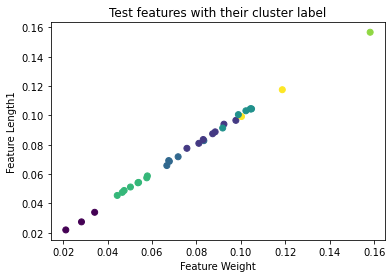

In [5]:
# Plot test features with their cluster label
plt.figure()
plt.scatter(test_feature[:, 0], test_feature[:, 1], c=kmeans_test)
plt.xlabel("Feature Weight")
plt.ylabel("Feature Length1")
plt.title("Test features with their cluster label")
plt.savefig('../results/kfold.png',dpi=300)
plt.show()